In [1]:
from matplotlib import pyplot as plt
from matplotlib import patches
import numpy


In [2]:
#choose how many points
n = 10
points = numpy.zeros((n+1,3))

In [3]:
# input points
points[0] = [0.2, 0.9, 0]
points[1] = [0.09, 0.98, 0]
points[2] = [0.303, 0.987, 0]
points[3] = [0.4, 0.989, 0]
points[4] = [0.8, 0.9, 0]
points[5] = [0.15, 0.95, 0]
points[6] = [0.7, 0.9002, 0]
points[7] = [0.805, 0.901, 0]
points[8] = [0.5, 0.94, 0]
points[9] = [0.0, 0.0, 0]
points[10] = [1, 1, 0]

#must include [0,0]; so prompt for input of n-1 points

#print(points)

In [4]:
# test that points are in the [0,1] unit box; prompt to re-input points if not


In [5]:
# create ordered set S
s = numpy.zeros((n+1,2))
norm = numpy.zeros(n+1);
# keep s[n-1]=(0,0)
for i in range(0,n+1):
    norm[i]=points[i, 0]+points[i, 1]
    points[i,2]=norm[i]
    
ind = numpy.argsort( points[:,2] ) 
s = points[ind]
    
print(s)

[[0.     0.     0.    ]
 [0.09   0.98   1.07  ]
 [0.15   0.95   1.1   ]
 [0.2    0.9    1.1   ]
 [0.303  0.987  1.29  ]
 [0.4    0.989  1.389 ]
 [0.5    0.94   1.44  ]
 [0.7    0.9002 1.6002]
 [0.8    0.9    1.7   ]
 [0.805  0.901  1.706 ]
 [1.     1.     2.    ]]


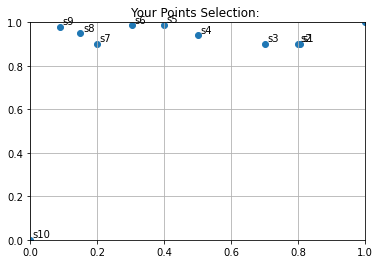

In [6]:
# plot point selection
x = s[:, 0]
y = s[:, 1]
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid()
plt.scatter(x, y)
plt.title("Your Points Selection: ")
for i in range(0,n):
    plt.annotate("s" + str(n-i), (x[i], y[i]), xytext=(2.5, 2.5), textcoords='offset points')
plt.show()


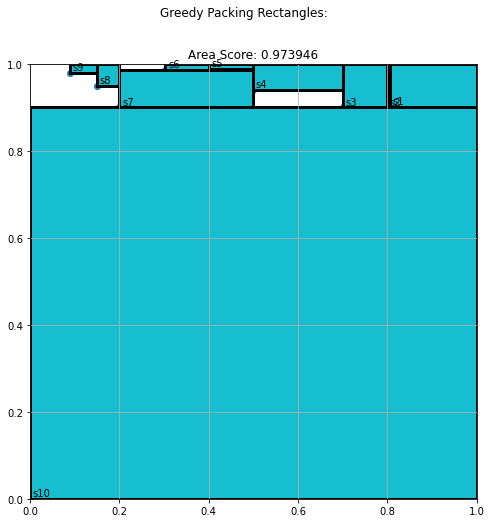

In [11]:
# GREEDYPACKING #
#plot rectangles
grectangle = numpy.zeros((n,2))
for i in range(0,n):
    #start at largest value; then through j = n-i-1; j is reverse index
    j=n-i-1
    heighttest=0
    widthtest=0
    minwidth=0
    height=0
    width=0
    area = 0
    testarea = 0

    #min area (starting guess)
    height=1-s[j,1]
    width= 1-s[j,0]
    for r in range(j+1,n+1):
        heighttest = s[r,1] - s[j,1]
        widthtest = s[r,0] - s[j,0]
        if(heighttest <= height):
            height=heighttest
        if(widthtest <= width):
            width = widthtest
        area = width*height
    
    #find max area over all disjoint axis parallel rectangles
    
    for ri in range(j+1,n+1):
        heighttest=s[ri,1]-s[j,1]
        minwidth=s[n,0]-s[j,0]
        intersects=0
        for rj in range(j+1,n+1):
            h=s[rj,1]-s[j,1]
            if(h < heighttest):
                widthtest = s[rj,0]-s[j,0]
                if(widthtest <= minwidth):
                    minwidth=widthtest
                intersects=intersects+1
                
        if(intersects==0):
            minwidth=1-s[j,0]
        testarea = minwidth*heighttest    
        
        if(testarea >= area):
            area = testarea
            height= heighttest
            width=minwidth
    
    grectangle[j,0]=width
    grectangle[j,1]=height

            
#compute area
greedy_area = 0
for i in range(0,n):
    greedy_area = greedy_area + grectangle[i,0]*grectangle[i,1]
        
x = s[0:n, 0]
y = s[0:n, 1]
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid()
plt.scatter(x, y)
plt.suptitle("Greedy Packing Rectangles: ")
plt.title("Area Score: " + str(greedy_area))
for i in range(0,n):
    plt.annotate("s" + str(n-i), (x[i], y[i]), xytext=(2.5, 2.5), textcoords='offset points')    
    plt.gca().add_patch(patches.Rectangle((x[i],y[i]), grectangle[i, 0], grectangle[i, 1], angle=0.0, linewidth=3, edgecolor='k', facecolor='tab:cyan'))
plt.rcParams['figure.figsize'] = [8, 8]
plt.show()


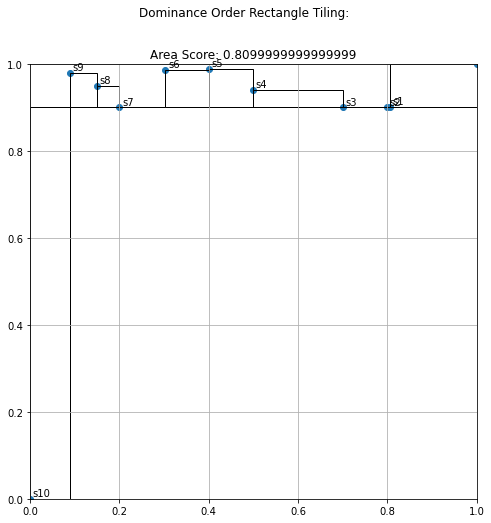

In [8]:
# DOMINANCE ORDER RECTANGLE PACKING #
#in progress; toward implementation of Tile Packing ALgorithm

#compute area of rectangles
#plot rectangles
#drectangle = numpy.zeros((n,2))
#for i in range(0,n):
#    #start at largest value; then through j = n-i-1
#    j=n-i-1
#    height=0
#    width=0
#    maxwidth=0
#    maxheight=0
#    height = 1- s[j,1]
#    width= 1-s[j,0]
#    for r in range(j+1,n):
#        #make sure new rectangle is disjoint
#        heighttest = s[r,1] - s[j,1]
#        widthtest = s[r,0] - s[j,0]
#        if(heighttest <= height):
#            height=heighttest
#        if(widthtest <= width):
#            width = widthtest
#    drectangle[j,0]=width
#    drectangle[j,1]=height
            
#compute area
#dominance_area = 0
#for i in range(0,n):
#    dominance_area = dominance_area + drectangle[j,0]*drectangle[j,1]
        
#x = s[:, 0]
#y = s[:, 1]
#plt.xlim(0, 1)
#plt.ylim(0, 1)
#plt.grid()
#plt.scatter(x, y)
#plt.suptitle("Dominance Order Rectangle Tiling: ")
#plt.title("Area Score: " + str(dominance_area))
#for i in range(0,n):
#    plt.annotate("s" + str(n-i), (x[i], y[i]), xytext=(2.5, 2.5), textcoords='offset points')    
#    plt.gca().add_patch(patches.Rectangle((x[i],y[i]), drectangle[i, 0], drectangle[i, 1], angle=0.0, linewidth=1, edgecolor='k', facecolor='none'))
#plt.show()
    


In [9]:
# TILE PACKING #


In [10]:
# BOTH & 